In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
parent_path = str(Path().joinpath('..').resolve())
sys.path.append(parent_path)

In [3]:
import itertools
from triple_agent.parsing.replay.get_parsed_replays import get_parsed_replays
from triple_agent.reports.generation.plot_specs import AxisProperties, DataQueryProperties
from triple_agent.constants.events import (SCL5_DROPPED_PLAYERS,
                                                    SCL5_DIVISIONS,
                                                    SCL5_PICK_MODES,
                                                    SCL5_VENUE_MODES,
                                                    select_scl5_regular_season)
from triple_agent.reports.specific.mission_choices import mission_choices
from triple_agent.reports.specific.mission_completes import mission_completion_query, mission_completion
from triple_agent.classes.missions import Missions

In [4]:
scl5_replays = get_parsed_replays(select_scl5_regular_season)

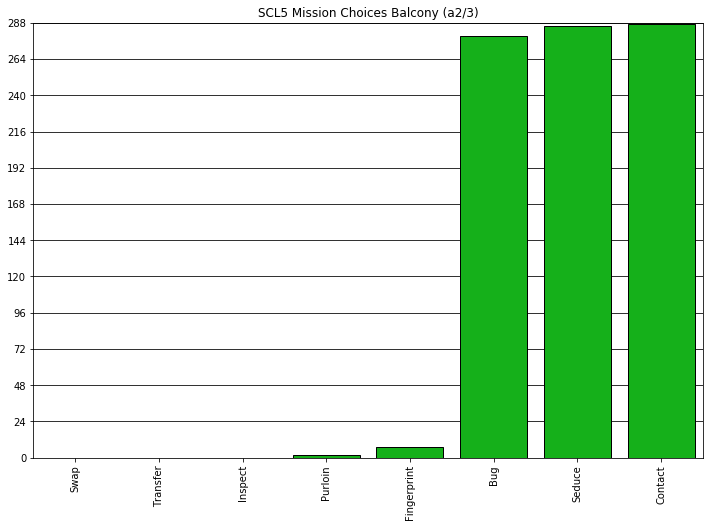

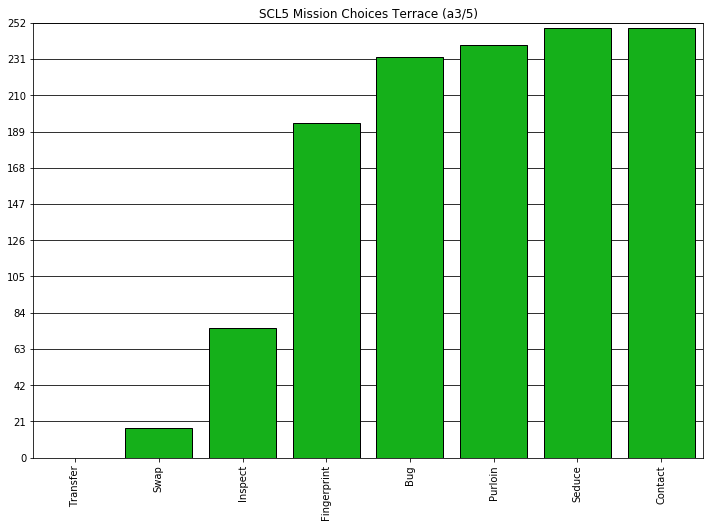

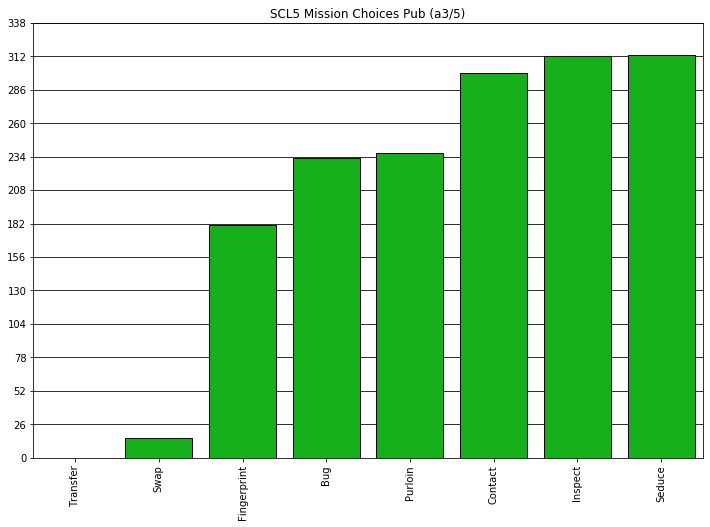

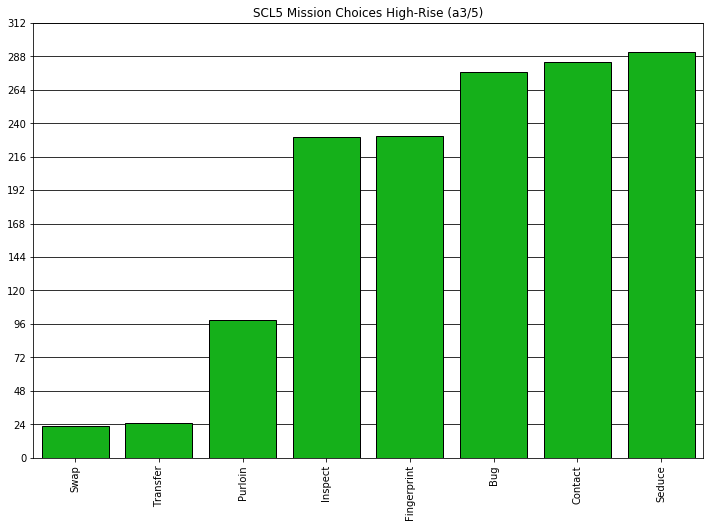

In [5]:
for venue, mode in SCL5_PICK_MODES.items():
    venue_games = filter(lambda g: g.venue==venue, scl5_replays)
    mission_choices(
        venue_games,
        DataQueryProperties(primary_order=sum),
        AxisProperties(title=f"SCL5 Mission Choices {venue} ({mode})",force_bar=True)
    )

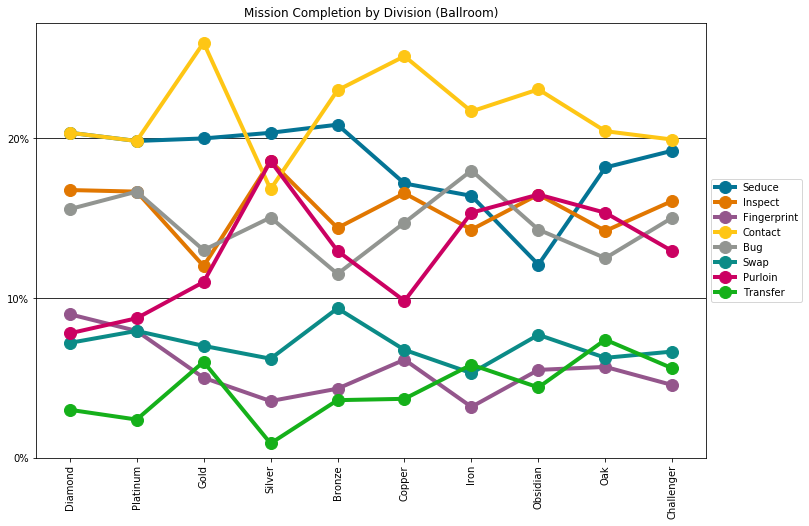

DataPlotProperties(frame=                       Diamond  Platinum  Gold    Silver    Bronze    Copper  \
Missions.Seduce       0.203593  0.198413  0.20  0.203540  0.208633  0.171779   
Missions.Inspect      0.167665  0.166667  0.12  0.185841  0.143885  0.165644   
Missions.Fingerprint  0.089820  0.079365  0.05  0.035398  0.043165  0.061350   
Missions.Contact      0.203593  0.198413  0.26  0.168142  0.230216  0.251534   
Missions.Bug          0.155689  0.166667  0.13  0.150442  0.115108  0.147239   
Missions.Swap         0.071856  0.079365  0.07  0.061947  0.093525  0.067485   
Missions.Purloin      0.077844  0.087302  0.11  0.185841  0.129496  0.098160   
Missions.Transfer     0.029940  0.023810  0.06  0.008850  0.035971  0.036810   

                          Iron  Obsidian       Oak  Challenger  
Missions.Seduce       0.164021  0.120879  0.181818    0.192308  
Missions.Inspect      0.142857  0.164835  0.142045    0.160839  
Missions.Fingerprint  0.031746  0.054945  0.056818    0.045

In [6]:
venue = 'Ballroom'
scl5_mode_replays = list(filter(lambda g: g.event == 'SCL5' and g.venue==venue, scl5_replays))

mission_completion_query(
    scl5_mode_replays,
    DataQueryProperties(
        groupby=lambda g: g.division,
        percent_normalized_data=True,
        secondary_order=lambda name_series: SCL5_DIVISIONS.index(name_series[0]),
    ),
    AxisProperties(title=f"Mission Completion by Division ({venue})",force_line=True)
)

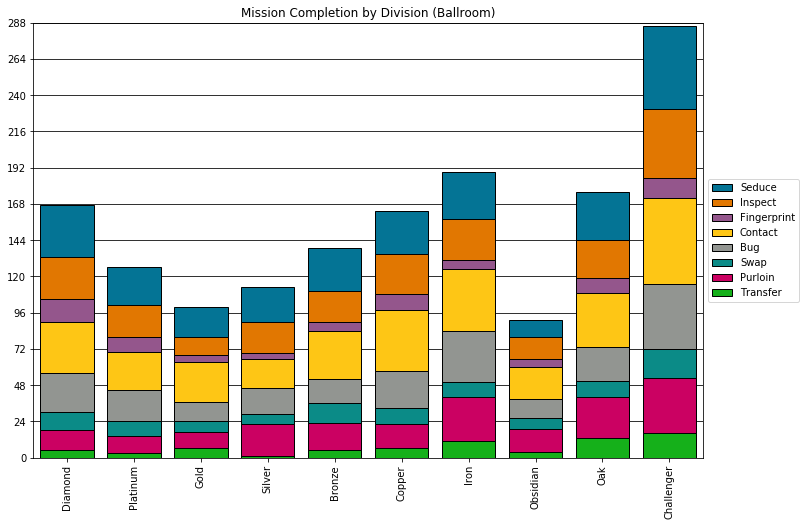

DataPlotProperties(frame=                      Diamond  Platinum  Gold  Silver  Bronze  Copper  Iron  \
Missions.Seduce            34        25    20      23      29      28    31   
Missions.Inspect           28        21    12      21      20      27    27   
Missions.Fingerprint       15        10     5       4       6      10     6   
Missions.Contact           34        25    26      19      32      41    41   
Missions.Bug               26        21    13      17      16      24    34   
Missions.Swap              12        10     7       7      13      11    10   
Missions.Purloin           13        11    11      21      18      16    29   
Missions.Transfer           5         3     6       1       5       6    11   

                      Obsidian  Oak  Challenger  
Missions.Seduce             11   32          55  
Missions.Inspect            15   25          46  
Missions.Fingerprint         5   10          13  
Missions.Contact            21   36          57  
Missions.Bug 

In [7]:
venue = 'Ballroom'
scl5_mode_replays = list(filter(lambda g: g.event == 'SCL5' and g.venue==venue, scl5_replays))

mission_completion_query(
    scl5_mode_replays,
    DataQueryProperties(
        groupby=lambda g: g.division,
        secondary_order=lambda name_series: SCL5_DIVISIONS.index(name_series[0]),
    ),
    AxisProperties(title=f"Mission Completion by Division ({venue})")
)

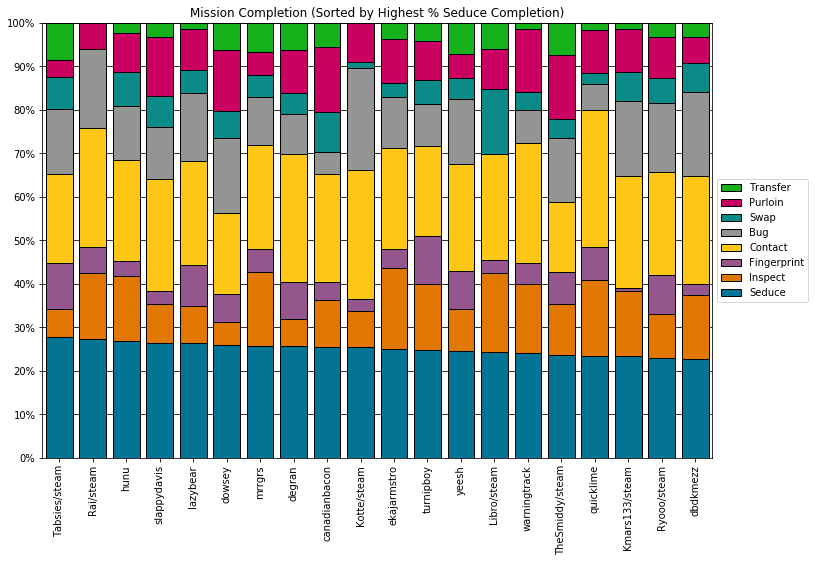

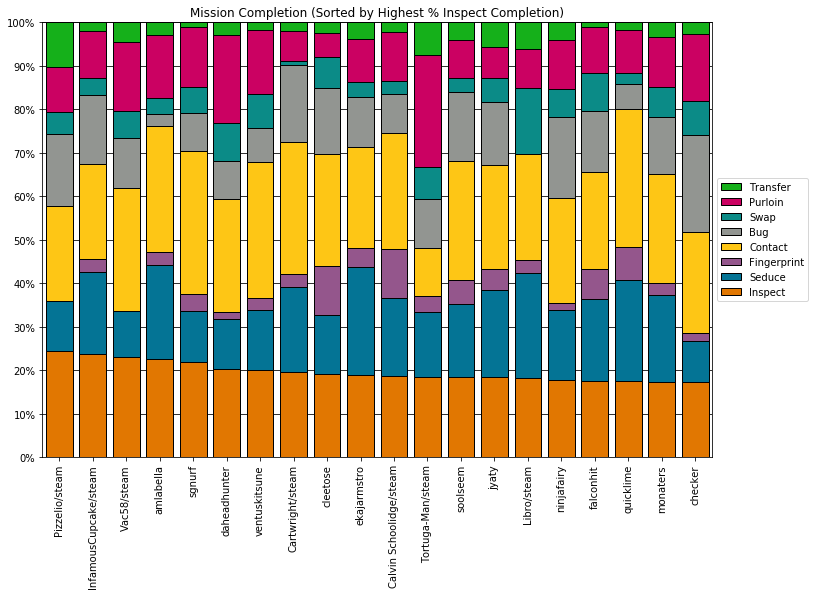

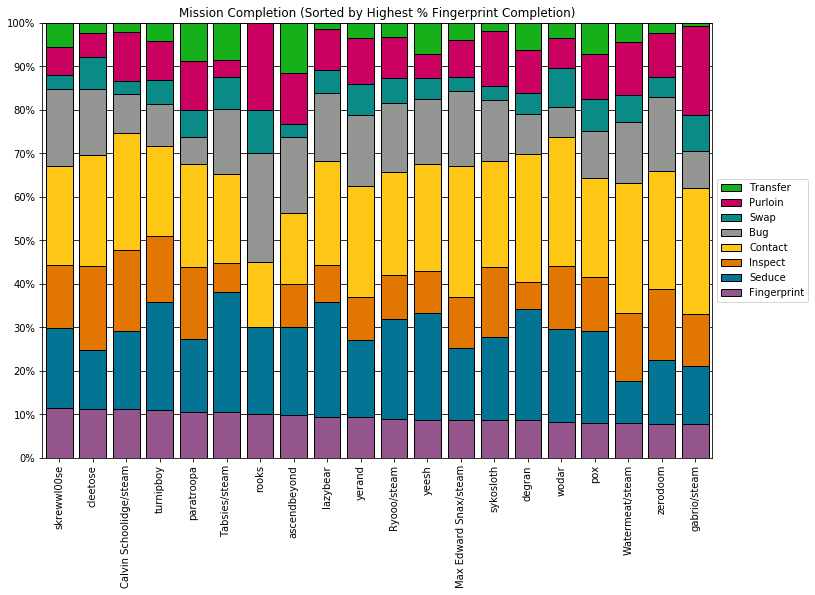

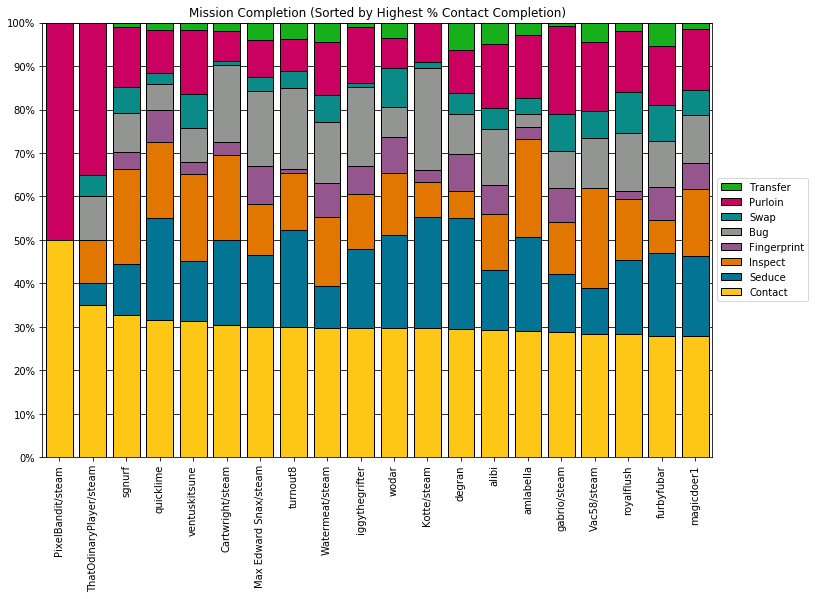

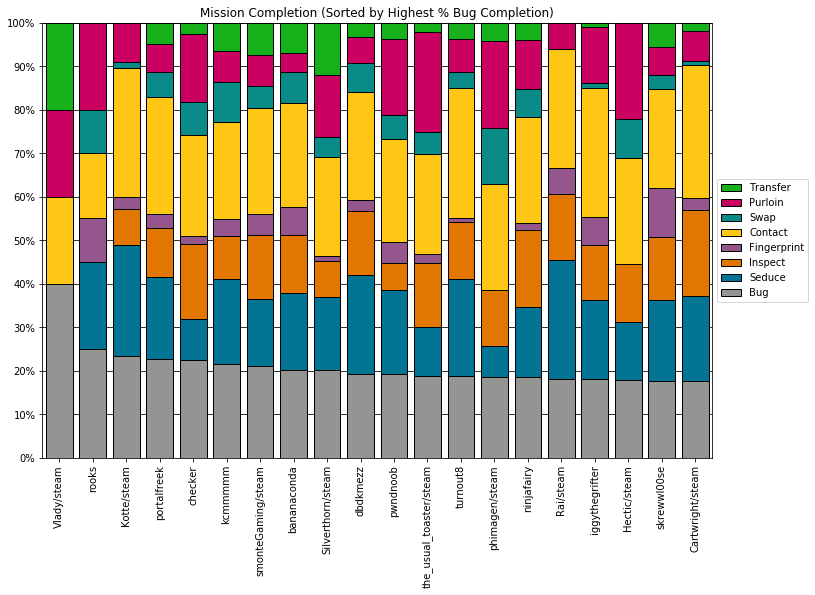

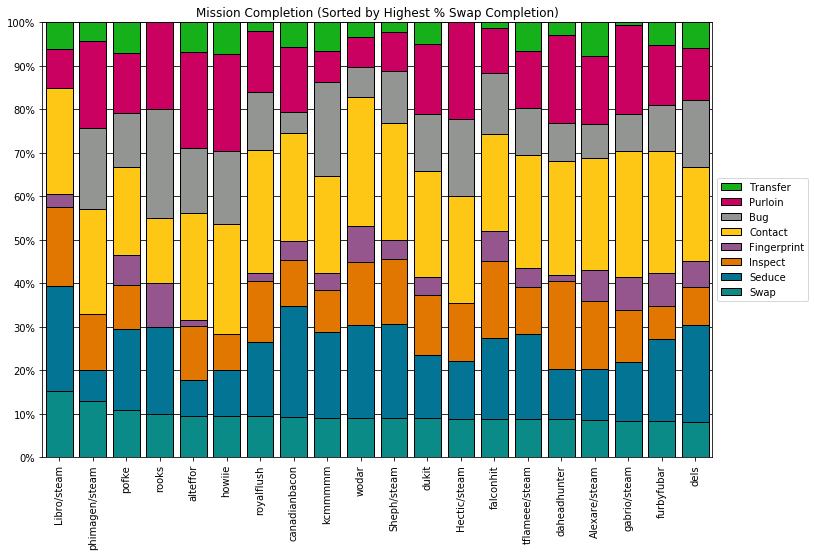

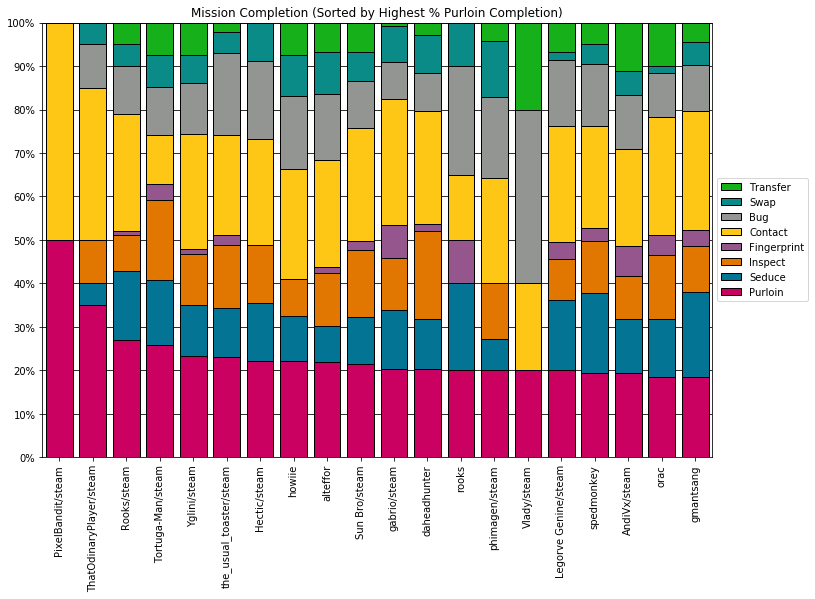

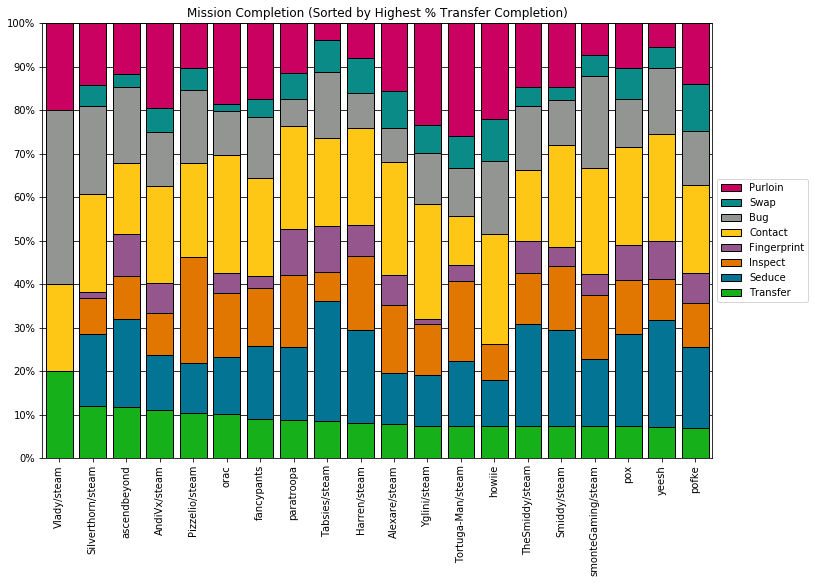

In [8]:
for m in Missions:
    if m != Missions.NoMission:
        mission_completion_query(
            scl5_replays,
            DataQueryProperties(
                groupby=lambda g: g.spy,
                secondary_order = lambda name_series: name_series[1][m],
                primary_order = sorted([__m for __m in Missions if __m != Missions.NoMission], key=lambda _m: _m != m),
                limit=20,
                reverse_primary_order=True,
                reverse_secondary_order=True,
                percent_normalized_data=True,
            ),
            AxisProperties(title=f"Mission Completion (Sorted by Highest % {m.name} Completion)")
        )

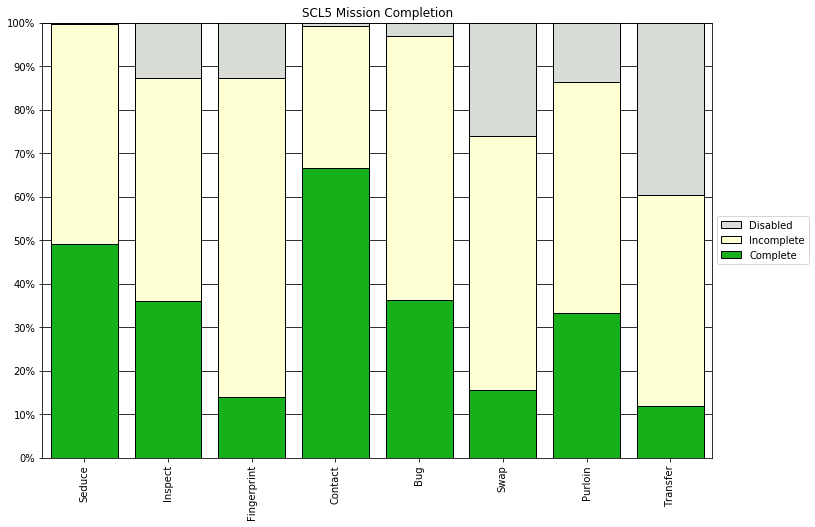

In [9]:
mission_completion(scl5_replays, "SCL5 Mission Completion")

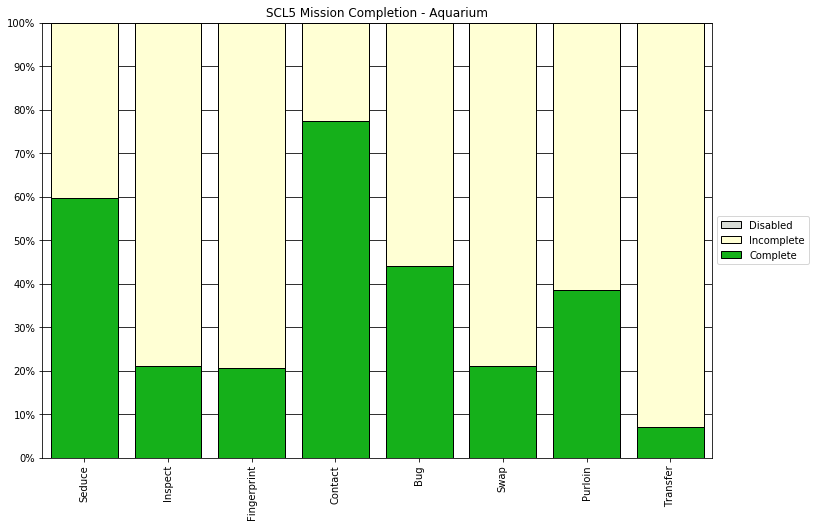

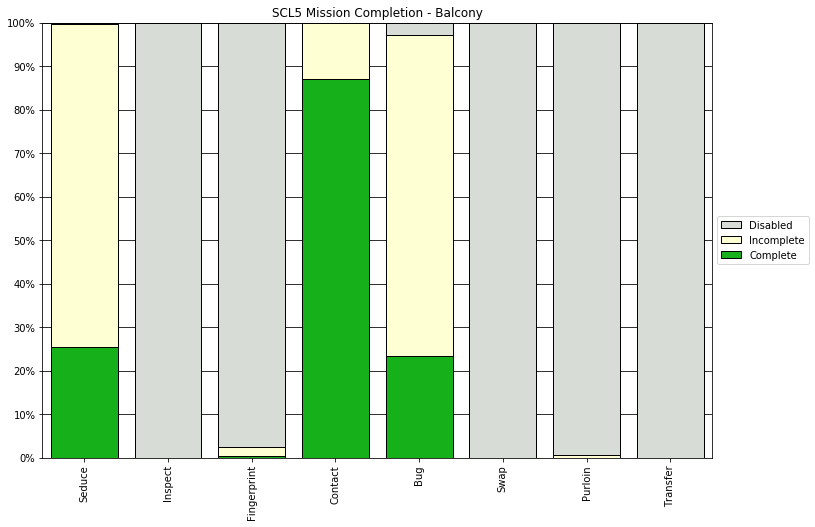

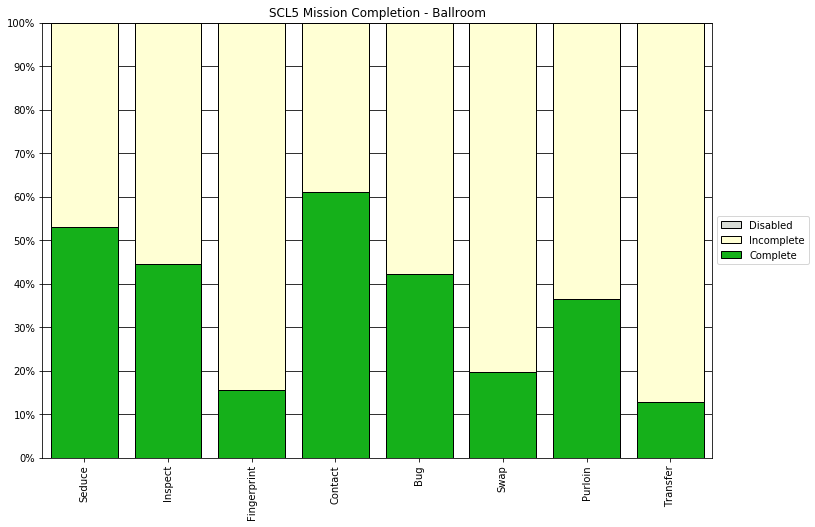

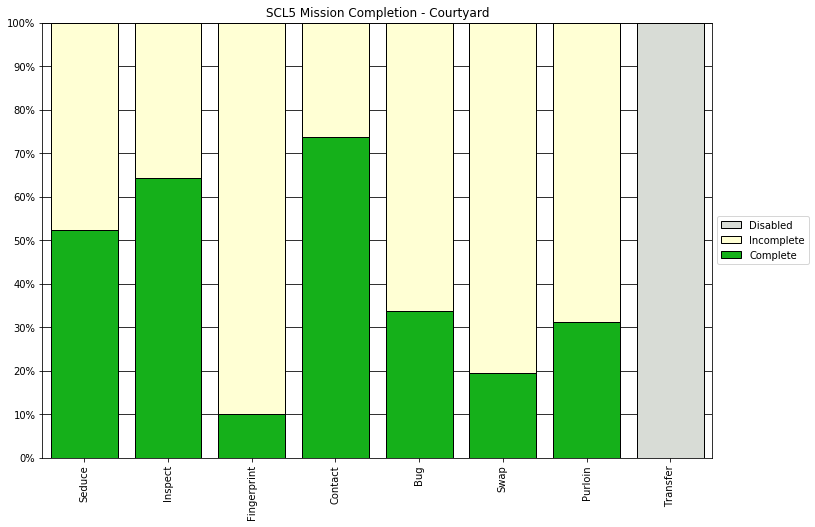

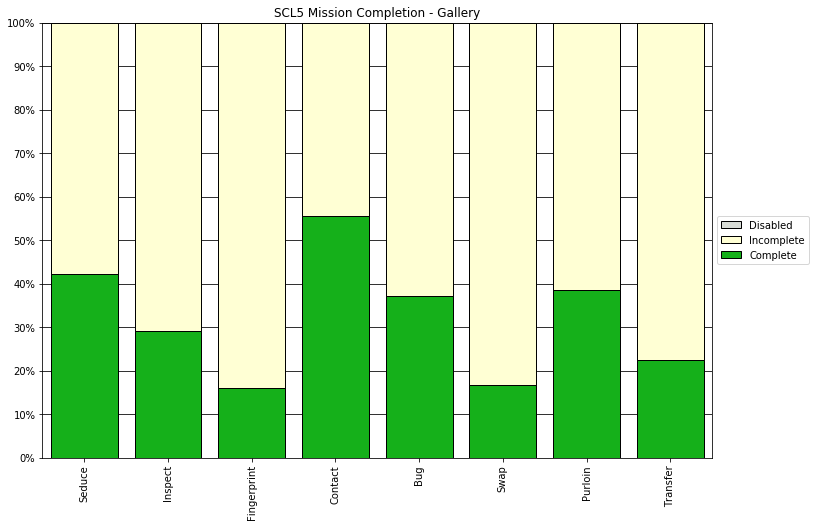

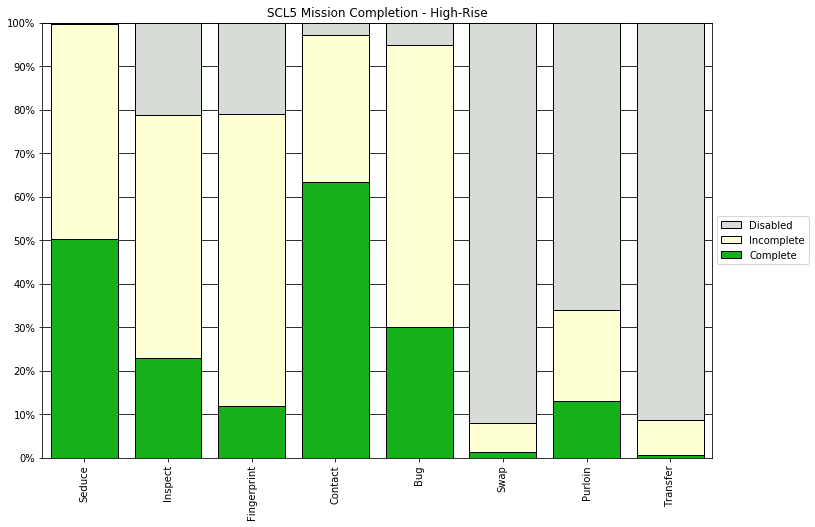

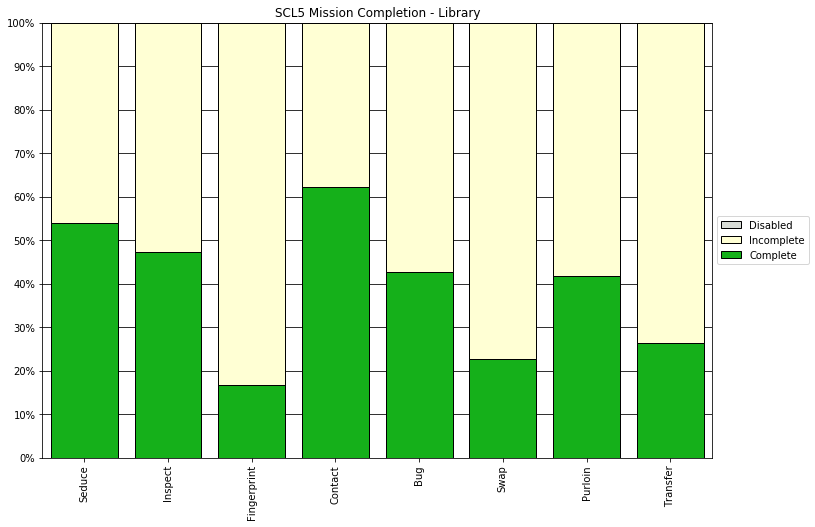

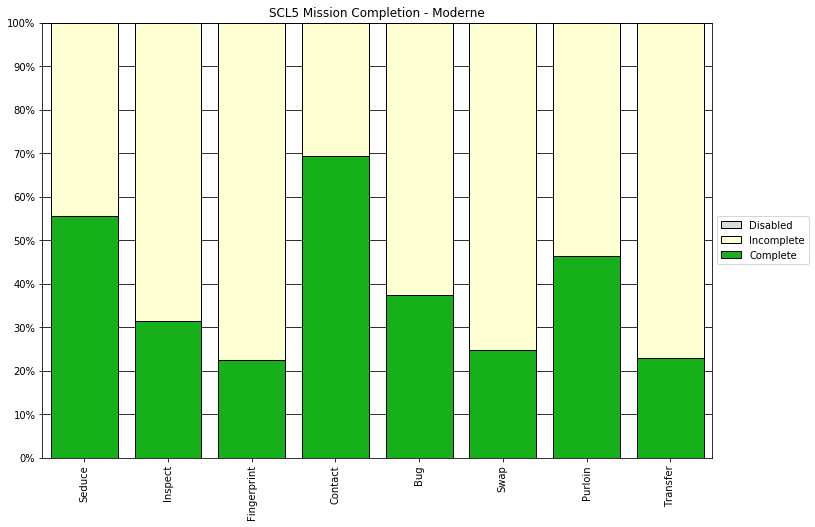

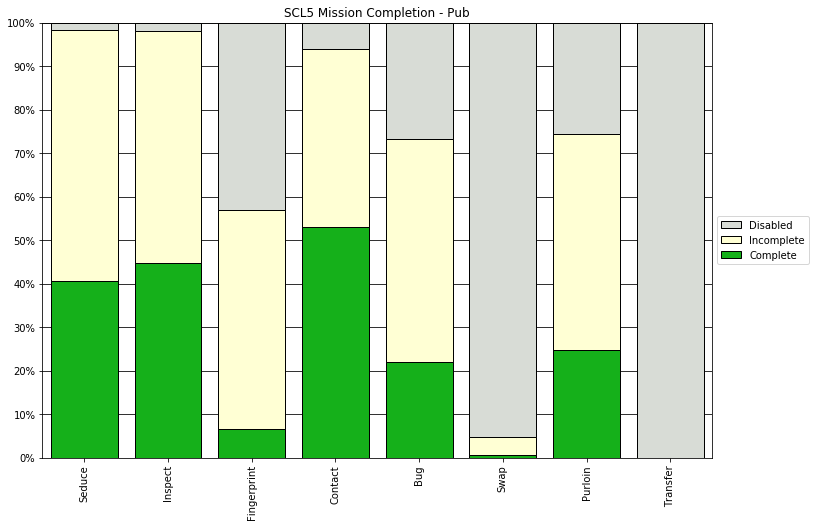

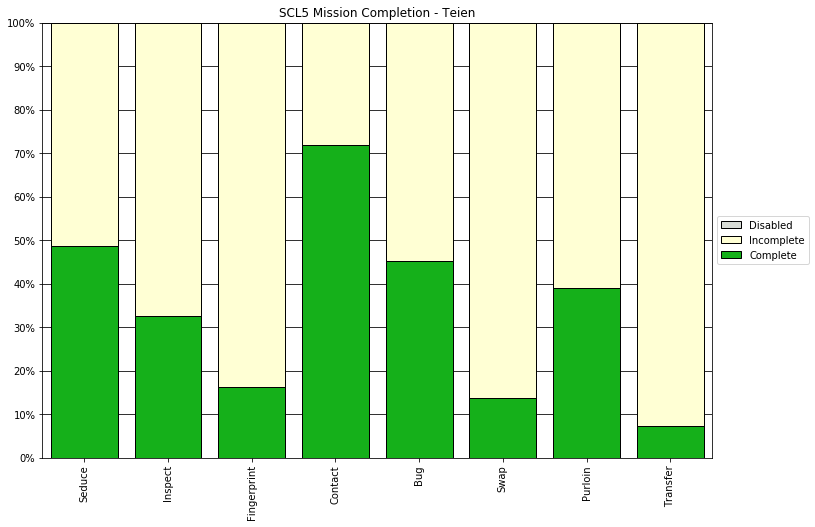

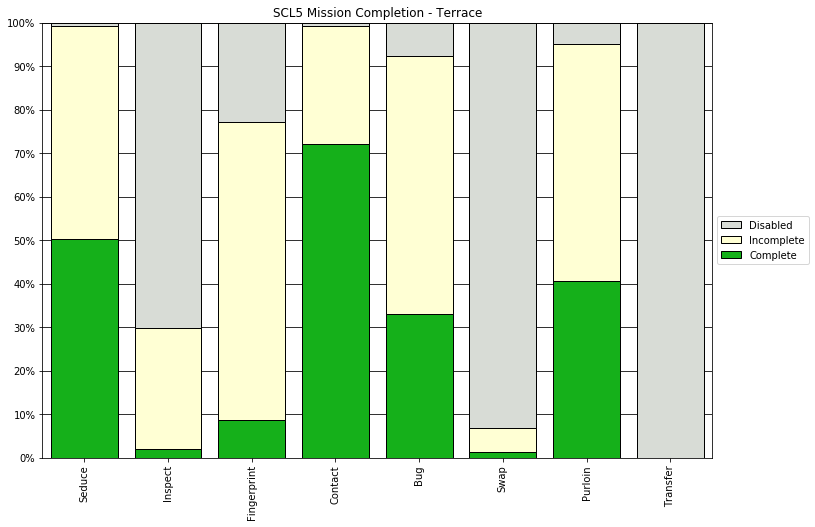

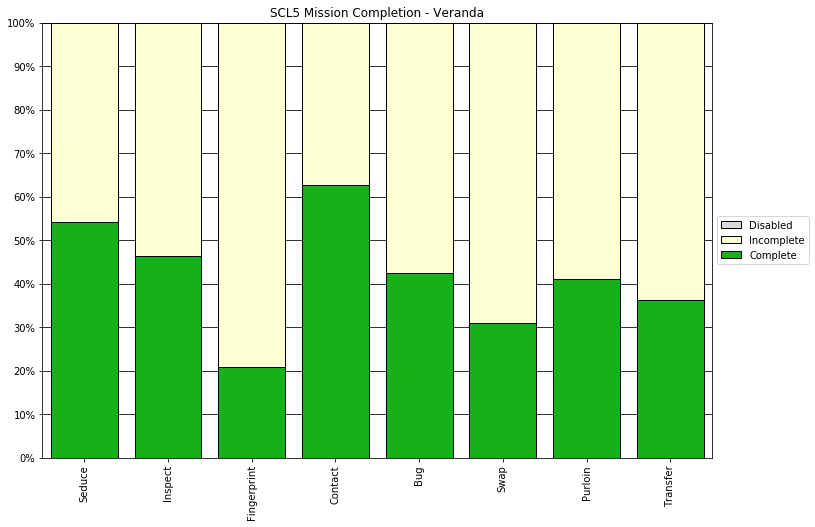

In [10]:
for venue, venue_group in itertools.groupby(sorted(scl5_replays, key=lambda g: g.venue), key=lambda g: g.venue):
    mission_completion(list(venue_group), f"SCL5 Mission Completion - {venue}")